## tutorial suspension under equilibrium condition

The goal of this tutorial is to analyse results of suspended sediment at equilibrium simulations obtained with sedExnerFoam.

Lyn, D. A. "A similarity approach to turbulent sediment-laden flows in open channels." Journal of Fluid Mechanics 193 (1988): 1-26.

In [2]:
# import all libraries needed
import numpy as np
import matplotlib.pyplot as plt
from fluidfoam import openfoamsimu as ofsim

Let us first plot the experimental data

In [7]:
from readLynExpData import readLynParams
pathData = "../DATA/dataLyn1988/"

caseList = readLynParams(pathData + "parametersExpLyn.txt")

/tmp/ipykernel_2250564/468362531.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


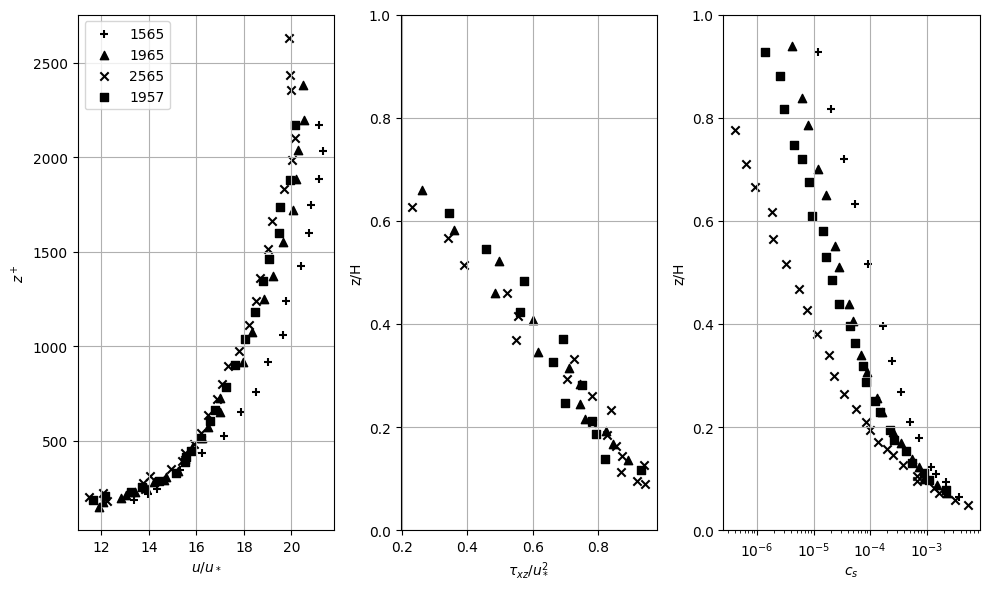

In [26]:
# choose color and marker for each case
for case in caseList:
    if case["name"] == "1565":
        case["marker"] = "+"
        case["color"] = "black"
    if case["name"] == "1965":
        case["marker"] = "^"
        case["color"] = "black"
    if case["name"] == "2565":
        case["marker"] = "x"
        case["color"] = "black"
    if case["name"] == "1957":
        case["marker"] = "s"
        case["color"] = "black"


fig, (axU, axTau, axC) = plt.subplots(ncols=3, figsize=(10, 6))

for case in caseList:
    pathUuf = pathData + "Uuf" + case["name"] + ".txt"
    Zu, Uuf = np.loadtxt(pathUuf, delimiter=";", unpack=True)
    axU.scatter(Uuf, Zu, marker=case["marker"], color=case["color"], label=case["name"])

    pathRstress = pathData + "Rstress" + case["name"] + ".txt"
    if case["name"] != "1565":
        ZRstress, Rstress = np.loadtxt(
            pathRstress, delimiter=";", unpack=True)
        axTau.scatter(Rstress, ZRstress,
                       marker=case["marker"], color=case["color"])
    
    pathC = pathData + "Ceq" + case["name"] + ".txt"
    Zc, C = np.loadtxt(pathC, delimiter=";", unpack=True)
    axC.scatter(C, Zc, marker=case["marker"], color=case["color"])

axU.set_xlabel(r"$u/u_*$")
axU.set_ylabel(r"$z^+$")
axU.grid()
axU.legend()

axTau.set_xlabel(r"$\tau_{xz}/u_*^2$")
axTau.set_ylabel("z/H")
axTau.set_ylim(0, 1)
axTau.grid()

axC.set_xlabel(r"$c_s$")
axC.set_ylabel("z/H")
axC.set_ylim(0, 1)
axC.set_xscale("log")

axC.grid()

fig.tight_layout()
fig.show()